In [2]:
library(lubridate)
library(data.table)
library(dplyr)
library(Polychrome)
library(ggplot2)

In [3]:
datetimediff = function(t){
    t = sapply(strsplit(t, ", "), "[", 2)
    #tt = as.Date(t, format='%d %b %Y %H:%M:%S')
    tt = as.POSIXct(t,format='%d %b %Y %H:%M:%S')
    tt = sapply(tt, function(d) as.numeric(difftime(d , tt[1],units = 'mins'))  )
    return(tt)
}

In [6]:
header = c("RetweetCount", "UserId", "ScreenName", "FollowerCount", "DistanceFromRoot", "Time", "ParentScreenName", "Text")
data = read.table('../data/retweet_data/Source_followers_tweet_0031_CNET.txt',sep = '\t',col.names = header, quote="")

data$TimeDiff = datetimediff(data$Time)
data$Time = NULL
data$Text = NULL
#data

In [13]:
header = c("RetweetCount", "UserId", "ScreenName", "FollowerCount", "DistanceFromRoot", "Time", "ParentScreenName", "Text")
file_list <- list.files(path="../data/retweet_data/",full.names = T)
dataset = data.frame()
counter = 1
all.data = list()
for (f in file_list){
    d = read.table(f,sep = '\t',col.names = header,header=FALSE, quote="")
    #d$FollowerCount = as.numeric(d$FollowerCount)
    d$TimeDiff = datetimediff(d$Time)
    d$Time = NULL
    d$Text = NULL
    d$response = NA
    d$rootFollow = NA
    d$rootFollow[1] = head(d$FollowerCount,n=1)
    d$response[1] = tail(d$RetweetCount,n=1)
    d$TimeRatio = d$TimeDiff/tail(d$TimeDiff,n=1)
    d$RetweetRatio = d$RetweetCount/tail(d$RetweetCount,n=1)
    d$case = counter
    counter = counter + 1
    dataset <- rbindlist(list(dataset, d), use.names = T)
}
dataset %>% mutate(FollowerCount = as.numeric(replace(FollowerCount,FollowerCount=="None",0))) -> dataset
C52 = createPalette(52,  c("#ff0000", "#00ff00", "#0000ff"))
dataset$color = rep(C52, times=c(table(dataset$case)))

In [14]:
#ds = dataset
head(dataset)
dim(dataset)

RetweetCount,UserId,ScreenName,FollowerCount,DistanceFromRoot,ParentScreenName,TimeDiff,response,rootFollow,TimeRatio,RetweetRatio,case,color
<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
0,158426909,Lawrence,87039,0,Lawrence,0.000000,21,87039,0.000000000,0.00000000,1,#FA0D0D
1,38998962,lancejgosnell,367,1,Lawrence,0.400000,NA,NA,0.001152959,0.04761905,1,#FA0D0D
2,377745103,EleanorWhitel,444,1,Lawrence,0.500000,NA,NA,0.001441199,0.09523810,1,#FA0D0D
3,193070651,twitnjackie,42,1,Lawrence,2.066667,NA,NA,0.005956956,0.14285714,1,#FA0D0D
4,61341105,theblkpanther52,235,1,Lawrence,2.183333,NA,NA,0.006293236,0.19047619,1,#FA0D0D
5,15594535,JaynePR,898,1,Lawrence,2.516667,NA,NA,0.007254035,0.23809524,1,#FA0D0D


[1] 12248    13

In [19]:
# Modeel input
model_input = list(M=na.omit(dataset$response), S = dataset$TimeDiff, f = dataset$FollowerCount, d=dataset$DistanceFromRoot, X=52, N=nrow(dataset), J = na.omit(dataset$response)+1,
                  JCUM = cumsum(na.omit(dataset$response)+1), root_f = as.numeric(na.omit(dataset$rootFollow)))
saveRDS(model_input, '../data/model_input.rds')

In [174]:
#dataset %>% group_by(case) %>% 
#    plot(RetweetRatio~TimeRatio,data=.,type='l',col=color)
#abline(h=.8,v=.4)

In [29]:
an = as.numeric(dataset$FollowerCount)
sort(which(is.na(an)))

integer(0)

In [18]:
as.numeric(na.omit(dataset$rootFollow))

[1]    87039    23673   296352   132276    14128   192372  3284962   323815
 [9]     2227    48757   578095   199564  2522521  2077291   109540    48764
[17]   132430  1145340   186718  1710601  4517364   730324  1466263  5324047
[25]    40041  1466268   544349  1711092    32776   199781  2140075   132562
[33]  1142923 14410478  1146807     7951    40049  1711473 14433627    63280
[41] 14434356  3289428    38558  1133069 14435242   614687  2141660 14440584
[49]  2141988 14441398   721899  2626816

In [15]:
dataset[23,]

RetweetCount,UserId,ScreenName,FollowerCount,DistanceFromRoot,ParentScreenName,TimeDiff,response,rootFollow,TimeRatio,RetweetRatio,case,color
<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
0,164412502,pbsgwen,23673,0,pbsgwen,0,23,23673,0,0,2,#00F816


In [58]:
dataset %>% filter(case==2) %>% select(TimeDiff)  -> o
length(o$TimeDiff / tail(o$TimeDiff,n=1))
length(o$TimeDiff)

[1] 23

[1] 23

In [102]:
#dataset %>% filter(case==2)  %>% plot((RetweetCount/tail(TimeDiff,n=1))~(TimeDiff)/tail(TimeDiff,n=1), data=., type='l')
dataset %>% group_by(case) %>% mutate(TimeRatio = TimeDiff/tail(TimeDiff,n=1), RetweetRatio = RetweetCount/tail(RetweetCount,n=1),Color=C52)

ERROR: Error: Problem with `mutate()` input `Color`.
[31mx[39m Input `Color` can't be recycled to size 11.
[34mi[39m Input `Color` is `C52`.
[34mi[39m Input `Color` must be size 11 or 1, not 8777.
[34mi[39m The error occurred in group 1: case = 1.


In [104]:


# create your own color palette based on `seedcolors`

#swatch(P36)
C52

NC1       NC2       NC3       NC4       NC5       NC6       NC7       NC8 
"#F50D16" "#0DF80D" "#1616FC" "#FAD1D6" "#FC0DE2" "#00D1FD" "#F1E716" "#169156" 
      NC9      NC10      NC11      NC12      NC13      NC14      NC15      NC16 
"#A30D4B" "#5C3B86" "#F89400" "#8B6900" "#FD9FF7" "#C816FE" "#1CFBE6" "#555853" 
     NC17      NC18      NC19      NC20      NC21      NC22      NC23      NC24 
"#DAEAA7" "#7E9AFE" "#FB007D" "#CACBFD" "#00FCA2" "#80C300" "#D54522" "#F6998C" 
     NC25      NC26      NC27      NC28      NC29      NC30      NC31      NC32 
"#901C73" "#A2D0C7" "#FD45B4" "#267C94" "#A90DB5" "#773B3D" "#FFD47F" "#FB88BD" 
     NC33      NC34      NC35      NC36      NC37      NC38      NC39      NC40 
"#AA7CA3" "#6016BC" "#6E8622" "#CA8AFF" "#9DF5BB" "#A34000" "#A2A081" "#D53DB6" 
     NC41      NC42      NC43      NC44      NC45      NC46      NC47      NC48 
"#2265A9" "#FF5F85" "#87F0FE" "#267D6E" "#BD8A78" "#00C635" "#F256FF" "#984FFB" 
     NC49      NC50      NC51      NC52 
"#B0AA16" "#CE883B" "#9198AD" "#FECEFB"

In [117]:
color

ERROR: Error in eval(expr, envir, enclos): object 'color' not found


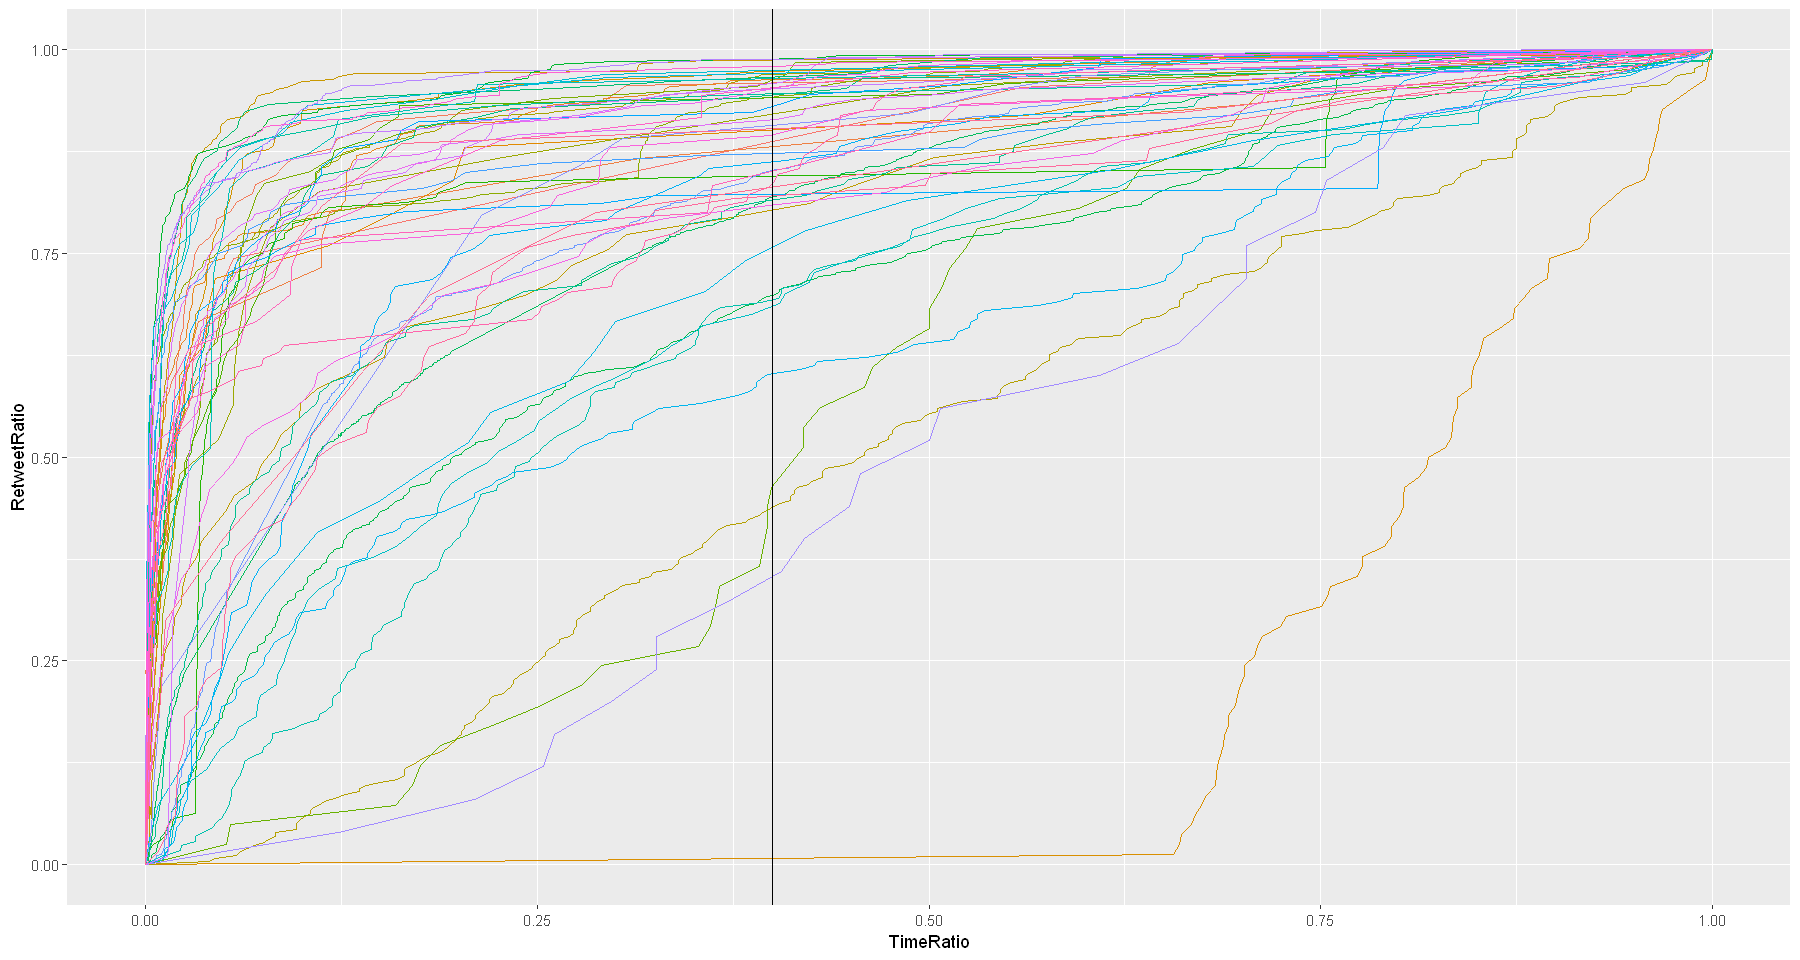

In [175]:
options(repr.plot.width=15, repr.plot.height=8)
dataset %>% group_by(case) %>% 
    mutate(TimeRatio = TimeDiff/tail(TimeDiff,n=1), RetweetRatio = RetweetCount/tail(RetweetCount,n=1)) %>% 
    ggplot(aes(y= RetweetRatio, x=TimeRatio,col=color)) +
    geom_line() +
    theme(legend.position = "none") +
    geom_vline(xintercept = .4)



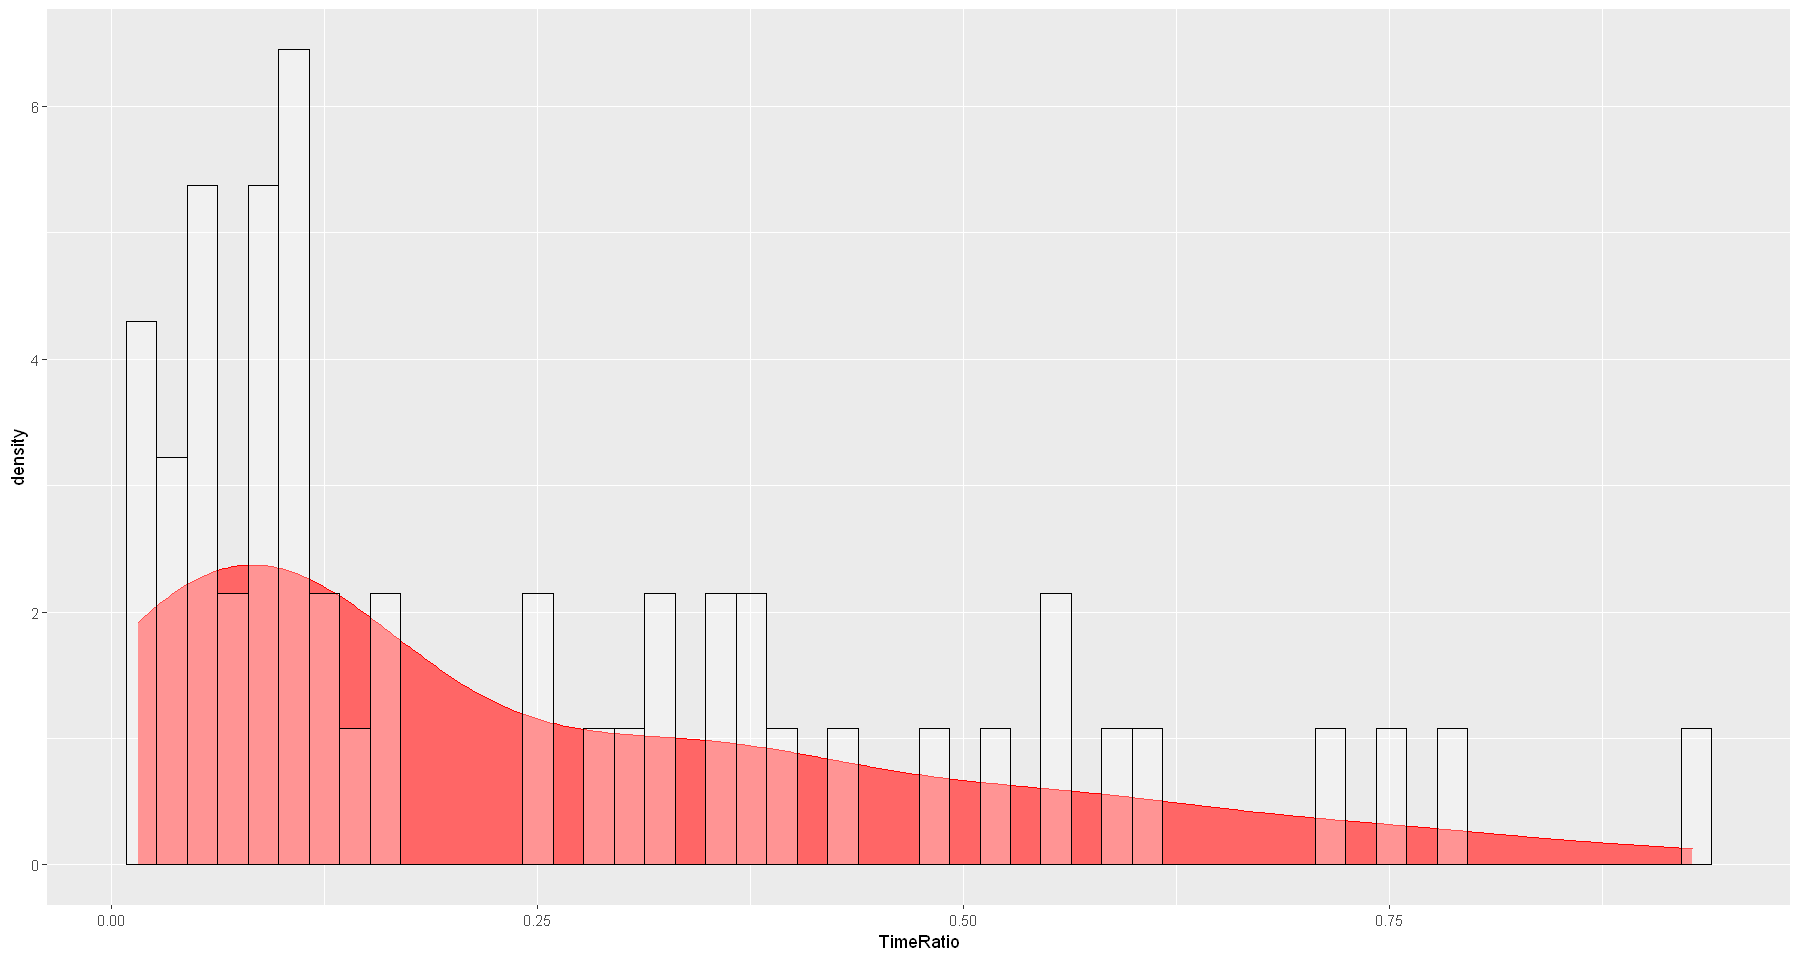

In [206]:
dataset %>% filter(RetweetRatio>=.8) %>% group_by(case) %>% filter(row_number()==1) %>% 
    ggplot(aes(x=TimeRatio)) +
    geom_density(color='red',fill="#FF6666") +
    geom_histogram(aes(y=..density..),bins=52,alpha=.3, position="identity",colour="black", fill="white")

[1] "#F50D16"

In [49]:
t[1]

[1] "13 Apr 2012 00:45:12 +0000"

In [59]:
tt2 = as.POSIXct(t,format='%d %b %Y %H:%M:%S')

In [75]:
as.numeric(difftime(tt2[11] , tt2[1],units = 'mins')) 

[1] 224.3

In [135]:
rainbow(4, start = 0.35, end = 0.6)

[1] "#00FF19" "#00FF99" "#00E6FF" "#0066FF"

In [136]:
 rainbow(4, start = 0, end = 0.25)[z]

ERROR: Error in eval(expr, envir, enclos): object 'z' not found


In [22]:
1:N
1:X
cumsum(J)

[1]     1     2     3     4     5     6     7     8     9    10    11    12
   [13]    13    14    15    16    17    18    19    20    21    22    23    24
   [25]    25    26    27    28    29    30    31    32    33    34    35    36
   [37]    37    38    39    40    41    42    43    44    45    46    47    48
   [49]    49    50    51    52    53    54    55    56    57    58    59    60
   [61]    61    62    63    64    65    66    67    68    69    70    71    72
   [73]    73    74    75    76    77    78    79    80    81    82    83    84
   [85]    85    86    87    88    89    90    91    92    93    94    95    96
   [97]    97    98    99   100   101   102   103   104   105   106   107   108
  [109]   109   110   111   112   113   114   115   116   117   118   119   120
  [121]   121   122   123   124   125   126   127   128   129   130   131   132
  [133]   133   134   135   136   137   138   139   140   141   142   143   144
  [145]   145   146   147   148   149   150   151   152   153   154   155   156
  [157]   157   158   159   160   161   162   163   164   165   166   167   168
  [169]   169   170   171   172   173   174   175   176   177   178   179   180
  [181]   181   182   183   184   185   186   187   188   189   190   191   192
  [193]   193   194   195   196   197   198   199   200   201   202   203   204
  [205]   205   206   207   208   209   210   211   212   213   214   215   216
  [217]   217   218   219   220   221   222   223   224   225   226   227   228
  [229]   229   230   231   232   233   234   235   236   237   238   239   240
  [241]   241   242   243   244   245   246   247   248   249   250   251   252
  [253]   253   254   255   256   257   258   259   260   261   262   263   264
  [265]   265   266   267   268   269   270   271   272   273   274   275   276
  [277]   277   278   279   280   281   282   283   284   285   286   287   288
  [289]   289   290   291   292   293   294   295   296   297   298   299   300
  [301]   301   302   303   304   305   306   307   308   309   310   311   312
  [313]   313   314   315   316   317   318   319   320   321   322   323   324
  [325]   325   326   327   328   329   330   331   332   333   334   335   336
  [337]   337   338   339   340   341   342   343   344   345   346   347   348
  [349]   349   350   351   352   353   354   355   356   357   358   359   360
  [361]   361   362   363   364   365   366   367   368   369   370   371   372
  [373]   373   374   375   376   377   378   379   380   381   382   383   384
  [385]   385   386   387   388   389   390   391   392   393   394   395   396
  [397]   397   398   399   400   401   402   403   404   405   406   407   408
  [409]   409   410   411   412   413   414   415   416   417   418   419   420
  [421]   421   422   423   424   425   426   427   428   429   430   431   432
  [433]   433   434   435   436   437   438   439   440   441   442   443   444
  [445]   445   446   447   448   449   450   451   452   453   454   455   456
  [457]   457   458   459   460   461   462   463   464   465   466   467   468
  [469]   469   470   471   472   473   474   475   476   477   478   479   480
  [481]   481   482   483   484   485   486   487   488   489   490   491   492
  [493]   493   494   495   496   497   498   499   500   501   502   503   504
  [505]   505   506   507   508   509   510   511   512   513   514   515   516
  [517]   517   518   519   520   521   522   523   524   525   526   527   528
  [529]   529   530   531   532   533   534   535   536   537   538   539   540
  [541]   541   542   543   544   545   546   547   548   549   550   551   552
  [553]   553   554   555   556   557   558   559   560   561   562   563   564
  [565]   565   566   567   568   569   570   571   572   573   574   575   576
  [577]   577   578   579   580   581   582   583   584   585   586   587   588
  [589]   589   590   591   592   593   594   595   596   597   598   599   600
  [6

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52

[1]    22    46    72   100   131   162   199   243   291   359   427   497
[13]   571   645   730   820   912  1004  1105  1202  1303  1410  1518  1636
[25]  1763  1890  2026  2161  2322  2486  2653  2829  3018  3221  3433  3689
[37]  3960  4248  4552  4858  5203  5573  6035  6541  7074  7134  7742  8353
[49]  9084  9853 10987 12248

In [ ]:
22